## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
from keras.optimizers import SGD  #Stochastic Gradient Descent
from keras.optimizers import Adam

import numpy as np

np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

2024-07-21 15:55:34.701856: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

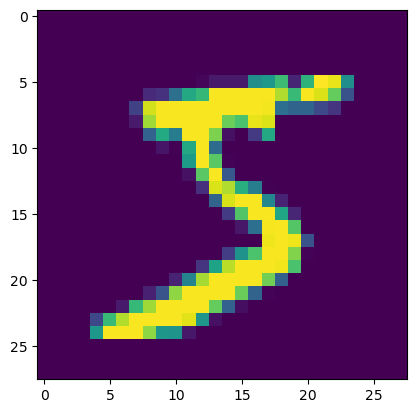

In [3]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

5

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255


In [8]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
def add_noise(images, scale):
    noise = np.random.normal(loc=0.0, scale=scale, size=images.shape)
    noisy_images = images + noise
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

In [10]:
def build_model(input_shape=(784,)):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model


In [11]:
scales = [0.1, 0.5, 1.0, 2.0, 4.0]
epochs = 20
batch_size = 128
history = {}

for scale in scales:
    print(f"Training with noise scale: {scale}")
    noisy_x_train = add_noise(x_train, scale)
    noisy_x_test = add_noise(x_test, scale)
    
    model = build_model()
    history[scale] = model.fit(noisy_x_train, y_train,
                               batch_size=batch_size,
                               epochs=epochs,
                               verbose=1,
                               validation_data=(noisy_x_test, y_test))


print("Training without noise")
model = build_model()
history['no_noise'] = model.fit(x_train, y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(x_test, y_test))


Training with noise scale: 0.1
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1047 - loss: 2.3046 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1119 - loss: 2.3007 - val_accuracy: 0.1122 - val_loss: 2.3032
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1174 - loss: 2.2968 - val_accuracy: 0.1063 - val_loss: 2.3043
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1387 - loss: 2.2812 - val_accuracy: 0.1001 - val_loss: 2.3144
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1573 - loss: 2.2591 - val_accuracy: 0.1047 - val_loss: 2.3269
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1868 - loss: 2.2211 - val_accuracy: 0.1035 - val_loss: 2.3683
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2168 - loss: 2.1616 - val_accuracy: 0.1022 - val_loss: 2.3998
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2571 - 

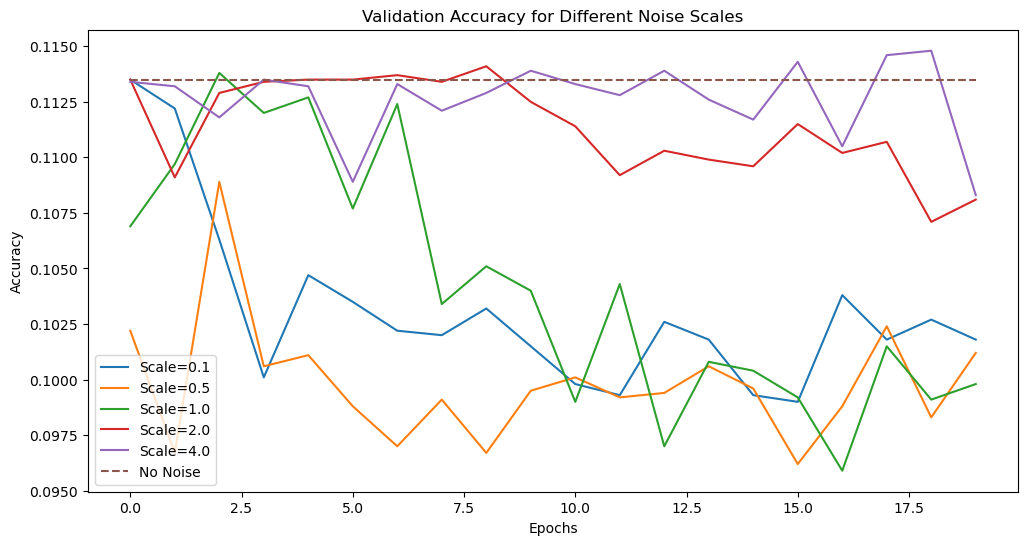

In [12]:
plt.figure(figsize=(12, 6))
for scale in scales:
    plt.plot(history[scale].history['val_accuracy'], label=f'Scale={scale}')
plt.plot(history['no_noise'].history['val_accuracy'], label='No Noise', linestyle='--')
plt.title('Validation Accuracy for Different Noise Scales')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

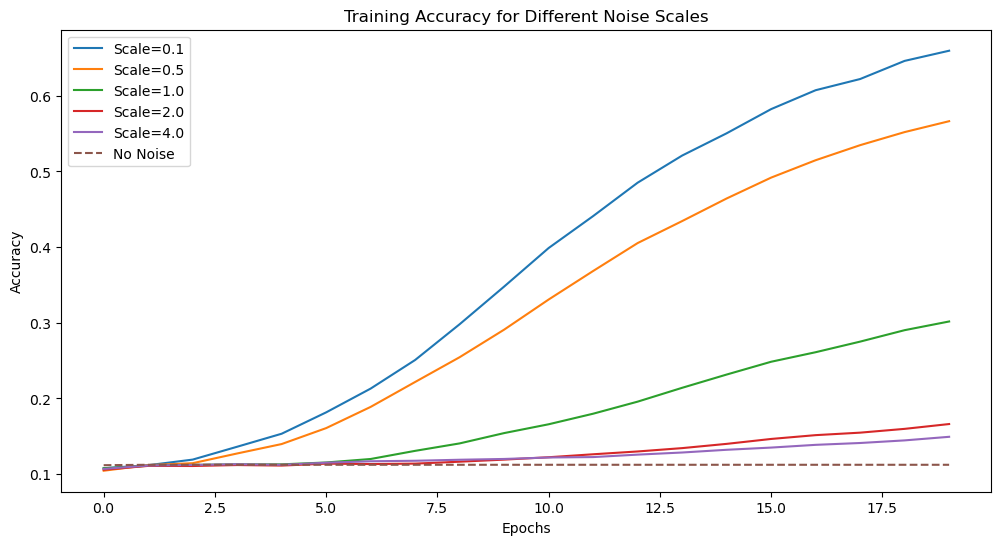

In [13]:
plt.figure(figsize=(12, 6))
for scale in scales:
    plt.plot(history[scale].history['accuracy'], label=f'Scale={scale}')
plt.plot(history['no_noise'].history['accuracy'], label='No Noise', linestyle='--')
plt.title('Training Accuracy for Different Noise Scales')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3010284900665283
Test accuracy: 0.11349999904632568
